In [6]:
from keras import models, layers

model = models.Sequential()

model.add(layers.Conv2D(
    32,
    (3,3),
    activation="relu",
    input_shape=(28,28,1)
))
model.add(layers.MaxPooling2D((2,2))) #FEATURE EXTRACTION
model.add(layers.Conv2D(64, (3,3), activation="relu")) #FEATURE EXTRACTION
model.add(layers.MaxPooling2D((2,2))) #FEATURE EXTRACTION
model.add(layers.Conv2D(64, (3,3), activation="relu")) #FEATURE EXTRACTION
model.add(layers.Flatten()) #LATENT SPACE
model.add(layers.Dense(64, activation ="relu"))
model.add(layers.Dense(10, activation ="softmax")) #CLASSIFIER

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [9]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

In [10]:
model.compile(
    optimizer="rmsprop", #always a good start
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [44]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype("float32") / 255.0
#divide by 255 to keep all numbers between 0 and 1

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype("float32") / 255.0
#divide by 255 to keep all numbers between 0 and 1

print("Before (Train):",train_labels[1])
train_labels = to_categorical(train_labels)
print("After (Train):",train_labels[1])

print("Before (Test):",test_labels[1])
test_labels = to_categorical(test_labels)
print("After (Test):",test_labels[1])

Before (Train): 0
After (Train): [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Before (Test): 2
After (Test): [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [45]:
print("train_images:",train_images.shape)
print("train_labels:",train_labels.shape)
print("test_images:",test_images.shape)
print("test_labels:",test_labels.shape)

train_images: (60000, 28, 28, 1)
train_labels: (60000, 10)
test_images: (10000, 28, 28, 1)
test_labels: (10000, 10)


In [46]:
partial_train_images = train_images[:50000,0:28,0:28,0:1]
partial_train_labels = train_labels[:50000,0:10]
val_images = train_images[50000:60000,0:28,0:28,0:1]
val_labels = train_labels[50000:60000,0:10]

In [47]:
print("partial_train_images:",partial_train_images.shape)
print("partial_train_labels:",partial_train_labels.shape)
print("val_images:",val_images.shape)
print("val_labels:",val_labels.shape)

partial_train_images: (50000, 28, 28, 1)
partial_train_labels: (50000, 10)
val_images: (10000, 28, 28, 1)
val_labels: (10000, 10)


In [51]:
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=64,
    validation_data = (val_images, val_labels)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 34s 564us/step - loss: 0.0081 - acc: 0.9975 - val_loss: 0.0113 - val_acc: 0.9971
Epoch 2/10
60000/60000 [==============================] - 41s 681us/step - loss: 0.0076 - acc: 0.9980 - val_loss: 0.0059 - val_acc: 0.9986
Epoch 3/10
60000/60000 [==============================] - 37s 623us/step - loss: 0.0058 - acc: 0.9982 - val_loss: 0.0039 - val_acc: 0.9992
Epoch 4/10
60000/60000 [==============================] - 35s 578us/step - loss: 0.0066 - acc: 0.9983 - val_loss: 0.0045 - val_acc: 0.9988
Epoch 5/10
60000/60000 [==============================] - 34s 574us/step - loss: 0.0042 - acc: 0.9986 - val_loss: 0.0050 - val_acc: 0.9988
Epoch 6/10
60000/60000 [==============================] - 35s 579us/step - loss: 0.0046 - acc: 0.9988 - val_loss: 0.0064 - val_acc: 0.9992
Epoch 7/10
60000/60000 [==============================] - 35s 582us/step - loss: 0.0044 - acc: 0.9987 - val_loss: 0.

available keys: dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


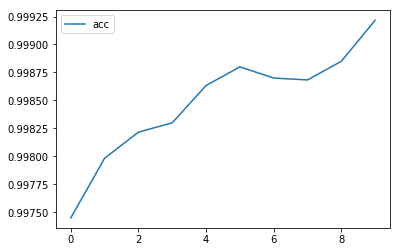

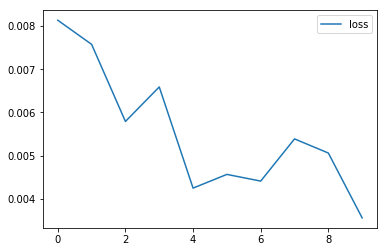

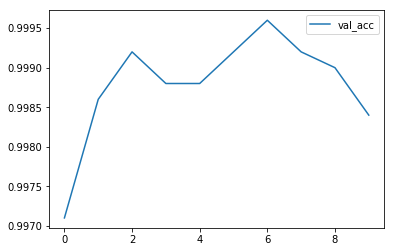

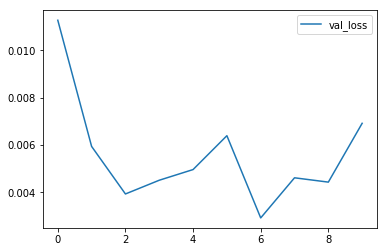

In [52]:
import matplotlib.pyplot as plt

print("available keys:",history.history.keys())

start_idx = 0

for key in sorted(history.history.keys()):
    #plt.figure(figsize=(10,5))
    plt.plot(history.history[key][start_idx:], label= key)
    plt.legend()
    plt.show()
    plt.close()
    

In [53]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)

10000/10000 [==============================] - 3s 268us/step
0.075223032043587 0.9911
